# Определение перспективного тарифа для телеком-компании

**Этапы проекта:**
 1. Обзор данных
 2. Предобработка данных
 3. Анализ данных
 4. Проверка гипотез
 5. Выводы

# Описание тарифов
<b>Тариф «Смарт»</b>
<br>Ежемесячная плата: 550 рублей
<br>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
<br>Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. <br>Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
<br><b>Тариф «Ультра»</b>
<br>Ежемесячная плата: 1950 рублей
<br>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
<br>Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**
<br> «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
<br> Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта

## Изучение данных из файлов

### Открытие файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st
import math
import seaborn as sns

In [2]:
#загрузим данные
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Изучение данных

#### Таблица `calls`

**Изучим общую информацию**

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В таблице со звонками можно сделать следующее:
- привести столбцы к целым числам (тип `int`): `id` и `duration`(оператор округляет звонки до минуты)
- привести столбец `call_date` к типу `datetime`

#### Таблица `internet`

In [6]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


В таблице с интернетом можно сделать следующее:
- привести столбцы к целым числам (тип `int`): `id` и `mb_used`
- привести столбец `session_date` к типу `datetime`
- округлить данные столбца `mb_used` до гигабайтов (округление оператора)

#### Таблица `messages`

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


В таблице с сообщениями можно сделать следующее:
- привести столбец `id` к целым числам (тип `int`)
- привести столбец `message_date` к типу `datetime`

#### Таблица `tariffs`

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Тут все в порядке

#### Таблица `users`

In [15]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В таблице с пользователями можно сделать следующее:
- привести столбец `reg_date` к типу `datetime`

### Вывод
<br> - данные содержат записи о 500 клиентах;
<br> - в данных требуется скорректировать типы, округлить звонки и мегабайты по условиям округления оператора;
<br> - нулевые данные по звонкам говорят, что звонки были пропущены, соответственно нулевые значения менять не стоит;
<br> - необходимо столбцы с тарифом в таблицах `users` и `tariffs` привести к единому имени `tariff`

In [18]:
print('Количество интернет трафика равным нулю:', internet.loc[internet['mb_used'] == 0, 'mb_used'].value_counts()[0])
print('Количество интернет трафика равным единице:', internet.loc[internet['mb_used'] == 1, 'mb_used'].value_counts()[1])
print('Всего записей по интернет трафику:', internet['id'].count())

Количество интернет трафика равным нулю: 19598
Количество интернет трафика равным единице: 1
Всего записей по интернет трафику: 149396


## Подготовка данных

### Замена типов данных в таблицах

Изменим типы данных в таблицах

In [19]:
# заменим типы данных в столбцах с датой
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [20]:
# заменим типы данных на целые
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['id'] = calls['id'].astype('int')
internet['id'] = internet['id'].astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')
messages['id'] = messages['id'].astype('int')

In [21]:
internet.head()

,id,mb_used,session_date,user_id
0,10000,113,2018-11-25,1000
1,10001,1053,2018-09-07,1000
2,10002,1198,2018-06-25,1000
3,10003,551,2018-08-22,1000
4,10004,303,2018-09-24,1000


Все данные в столбцах были приведены к корректным форматам

### Переименование столбцов

Приведем столбцы с тарифом в таблицах `users` и `tariffs` к единому имени `tariff`

In [22]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Дополнительные расчеты

**Посчитаем для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

**Расчет кол-ва сделанных звонков и израсходованных минут по месяцам**

In [23]:
# добавим столбец с месяцем в таблице `calls`
calls['month'] = calls['call_date'].dt.month

In [24]:
# расчитаем сводную таблицу, сгруппированную по кол-ву звонкам и их продолжительностью в месяц
user_calls = calls.pivot_table(index = ['user_id', 'month'], values='duration', aggfunc={'user_id': 'count', 'duration': 'sum'})
user_calls.columns = ['month_calls_duration', 'month_calls_total']
user_calls.head(10)


month_calls_duration  month_calls_total
user_id month                                         
1000    5                       159                 22
        6                       172                 43
        7                       340                 47
        8                       408                 52
        9                       466                 58
        10                      350                 57
        11                      338                 43
        12                      333                 46
1001    11                      430                 59
        12                      414                 63

**Расчет кол-ва отправленных сообщений по месяцам**

In [25]:
# добавим столбец с месяцем в таблице `messages`
messages['month'] = messages['message_date'].dt.month

In [26]:
# расчитаем сводную таблицу, сгруппированную по кол-ву сообщений в месяц
user_messages = messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc= 'count')
user_messages.columns = ['month_sms_total']
user_messages.head(10)

month_sms_total
user_id month                 
1000    5                   22
        6                   60
        7                   75
        8                   81
        9                   57
        10                  73
        11                  58
        12                  70
1002    6                    4
        7                   11

**Расчет израсходованного трафика по месяцам**

In [27]:
# добавим столбец с месяцем в таблице `internet`
internet['month'] = internet['session_date'].dt.month

In [28]:
# расчитаем сводную таблицу, сгруппированную по кол-ву сообщений в месяц
user_internet = internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc= 'sum')
user_internet.columns = ['month_mb_total']
user_internet.head(10)

month_mb_total
user_id month                
1000    5                2256
        6               23257
        7               14016
        8               14070
        9               14581
        10              14717
        11              14768
        12               9827
1001    11              18452
        12              14053

**Расчет помесячной выручки с каждого пользователя**

In [29]:
# добавим столбец с месяцем в таблице `users`
users['month'] = users['reg_date'].dt.month

In [30]:
# соеденим 2 сводные таблицы, созданные выше, в одну
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
# прибавим к df таблицу user_internet
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
# прибавим слева данные таблицы users с информацией по пользователям с городом и тарифом
df = df.merge(users[['user_id', 'city', 'tariff']], on='user_id', how='left')
# прибавим слева данные таблицы по тарифам
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,159.0,22.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,172.0,43.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,340.0,47.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,408.0,52.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,466.0,58.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [31]:
# проверим наличие пустых значений методом isna
df.isna().sum().sort_values()

user_id                    0
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
month_mb_total            11
month_calls_duration      40
month_calls_total         40
month_sms_total          497
dtype: int64

In [32]:
# заполним пустые значения в столбцах month_calls_duration, month_calls_total, month_sms_total, month_mb_total
columns_list = ['month_calls_duration', 'month_calls_total', 'month_sms_total', 'month_mb_total']
for col in columns_list:
    df[col] = df[col].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
user_id                  3214 non-null int64
month_calls_duration     3214 non-null float64
month_calls_total        3214 non-null float64
month_sms_total          3214 non-null float64
month_mb_total           3214 non-null float64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(4), int64(8), object(2)
memory usage: 376.6+ KB


In [33]:
# проверим данные на наличие дубликатов
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


In [34]:
# создадим функцию для расчета затрат клиента сверх тарифа в месяц

def costs_above_tariff(row):
    minuts = (row['month_calls_total'] - row['minutes_included']) * row['rub_per_minute']
    messages = (row['month_sms_total'] - row['messages_included']) * row['rub_per_message']
    mbs = np.ceil((row['month_mb_total'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [messages, minuts, mbs]:
        if i > 0:
            total += i
    return total

In [35]:
# добавим столбец с расходами сверх тарифа
df['costs_above_tariff'] = df.apply(lambda x: costs_above_tariff(x), axis=1)

In [36]:
# добавим столбец с общей выручкой в месяц
df['total_paid'] = df['rub_monthly_fee'] + df['costs_above_tariff']

In [37]:
df.head(20)

,user_id,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,costs_above_tariff,total_paid
0,1000,159.0,22.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,172.0,43.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,340.0,47.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,408.0,52.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,466.0,58.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
5,1000,350.0,57.0,73.0,14717.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
6,1000,338.0,43.0,58.0,14768.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,1000,333.0,46.0,70.0,9827.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,1001,430.0,59.0,0.0,18452.0,Москва,smart,50,15360,500,550,200,3,3,604.0,1154.0
9,1001,414.0,63.0,0.0,14053.0,Москва,smart,50,15360,500,550,200,3,3,0.0,550.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
user_id                  3214 non-null int64
month_calls_duration     3214 non-null float64
month_calls_total        3214 non-null float64
month_sms_total          3214 non-null float64
month_mb_total           3214 non-null float64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
costs_above_tariff       3214 non-null float64
total_paid               3214 non-null float64
dtypes: float64(6), int64(8), object(2)
memory usage: 426.9+ KB


### Вывод
<br> - типы данных были скорректированы
<br> - столбцы с названием тарифа были приведены к единообразию
<br> - в результате по каждому пользователю была расчитана выручка

## Анализ данных

**В ходе исследования выполним следующее:**

- определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифав месяц? 
- посчитаем среднее количество, дисперсию и стандартное отклонение;
- построим гистограммы и опишем распределения.

### Количество минут, смс и Мб в месяц по пользователям для каждого тарифа

In [39]:
df.head(10)

,user_id,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,costs_above_tariff,total_paid
0,1000,159.0,22.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,172.0,43.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,340.0,47.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,408.0,52.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,466.0,58.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
5,1000,350.0,57.0,73.0,14717.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
6,1000,338.0,43.0,58.0,14768.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,1000,333.0,46.0,70.0,9827.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,1001,430.0,59.0,0.0,18452.0,Москва,smart,50,15360,500,550,200,3,3,604.0,1154.0
9,1001,414.0,63.0,0.0,14053.0,Москва,smart,50,15360,500,550,200,3,3,0.0,550.0


In [40]:
# создадим сводную таблицу со значениями в месяц минут, мб и смс для каждого тарифа
#monthly_sum = df.pivot_table(index = 'user_id', values=['month_calls_duration', 'month_sms_total', 'month_mb_total','total_paid'], aggfunc= 'sum')
#for user_id in users['user_id']:
#    monthly_sum.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
#monthly_sum.head(10)


In [41]:
df.pivot_table(index = 'tariff', values=['month_calls_duration', 'month_sms_total', 'month_mb_total',
                                                           'total_paid'], aggfunc= ['sum'])

sum                                          
       month_calls_duration month_mb_total month_sms_total total_paid
tariff                                                               
smart              931577.0     36174861.0         74413.0  2471569.0
ultra              518724.0     19194598.0         48623.0  2029690.0

### Среднее количество, дисперсия и стандартное отклонение

In [42]:
# в сводной таблице расчитаем медианное значение, стандартное отклонение и дисперсию
deviations = df.pivot_table(index=['tariff'], values=['month_calls_duration', 'month_mb_total', 'month_sms_total', 'total_paid'], 
                    aggfunc={'month_calls_duration': [np.median, np.var, np.std],
                             'month_mb_total': [np.median, np.var, np.std], 
                             'month_sms_total': [np.median, np.var, np.std],
                             'total_paid': [np.median, np.var, np.std]})
deviations


month_calls_duration                            month_mb_total  \
                     median         std            var         median   
tariff                                                                  
smart                 422.0  190.313730   36219.315784        16531.0   
ultra                 518.0  317.606098  100873.633397        19324.0   

                                   month_sms_total                          \
                 std           var          median        std          var   
tariff                                                                       
smart    5877.576978  3.454591e+07            28.0  28.227876   796.812958   
ultra   10096.317202  1.019356e+08            38.0  47.804457  2285.266143   

       total_paid                             
           median         std            var  
tariff                                        
smart       797.0  708.095669  501399.477137  
ultra      1950.0  356.455650  127060.630690

По тарифу "Ультра" минуты разговора, объем потраченного интернет-трафика и число сообщений имеет большие медианы, стандартное отклонение и дисперсию по сравнению с тарифом «Смарт».

### Гистограммы

Построим матрицу диаграмм рассеивания по тарифу `Smart`

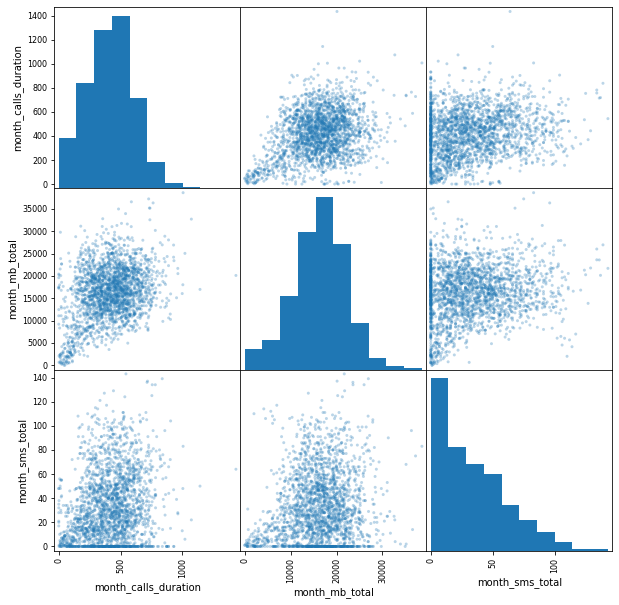

In [43]:
pd.plotting.scatter_matrix(df[df['tariff'] == 'smart']
                           [['month_calls_duration', 'month_mb_total', 'month_sms_total']],
                           alpha = 0.3, figsize = (10,10));

Построим матрицу диаграмм рассеивания по тарифу `Ultra`

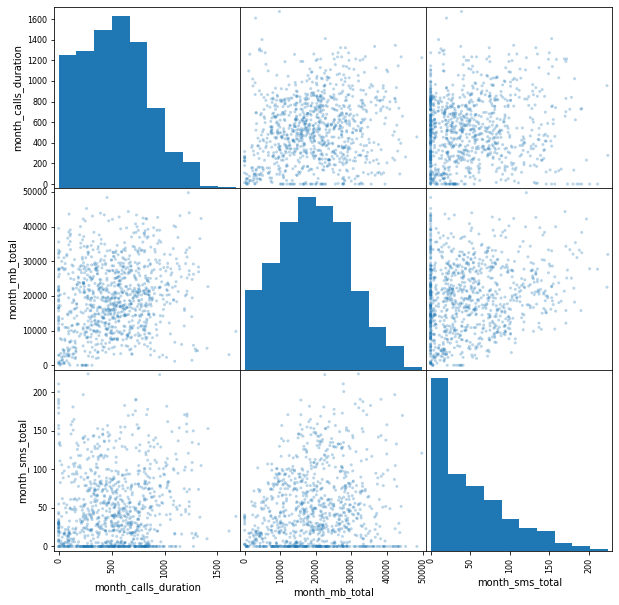

In [44]:
pd.plotting.scatter_matrix(df[df['tariff'] == 'ultra']
                           [['month_calls_duration', 'month_mb_total', 'month_sms_total']],
                           alpha = 0.3, figsize = (10,10));

### Вывод

По гистограммам по звонкам и интернет трафику распределения нормальные.
<br> По гистограмме сообщений распределение Пуассона.
<br> Гистограммы подтверждают предыдущие наблюдения, о том, что дисперсия по тарифу "Смарт" меньше, чем по тарифу "Ультра" по всем рассматриваемым параметрам: 
- по длительности разговора;
- по объему интернет-трафика;
- числу сообщений.

Это подтверждает тот факт, что по более дорогому тарифу, размах действий пользователей шире и свободнее по всем показателям.

## Проверка гипотез

**Проверим следующие гипотезы:**
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Сформулируем первую гипотезe:**

<br> Гипотеза H1 формируется из задания, соответственно, нулевая гипотеза будет ей противоположна.

<br> H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
<br> H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
<br> alpha примем равную 5%

### Проверка гипотезы о различиях средней выручки тарифов "Смарт" и "Ультра" 

In [46]:
# создадим две новые таблицы с выручкой по тарифам
ultra = df.query('tariff == "ultra"')['total_paid']
smart = df.query('tariff == "smart"')['total_paid']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу


results = st.ttest_ind(ultra, smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.6680337030884488e-284
Отвергаем нулевую гипотезу


Средние значения выручки по тарифам различаются почти в 2 раза (924 по тарифу "Смарт" против 1950 руб по тарифу "Ультра"). 
<br> Исходя из этого, можно утверждать, что доходы "Мегалайна" по тарифу "Ультра" отличаются по сравнению с доходами от тарифа "Смарт", а не равны.

### Проверка гипетозу об отличии средней выручки пользователей Москвы и регионов

**Сформулируем вторую гипотезу:**

<br> Гипотеза Н1 формируется из задания, соответственно, нулевая гипотеза будет ей противоположна.

<br> H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
<br> H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
<br> alpha примем равную 5%

In [47]:
# создадим две таблицы, с клиентами Москвы и прочими

moscow = df.query('city == "Москва"')['total_paid']
others = df.query('city != "Москва"')['total_paid']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(moscow, others)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.24536086905691057
Не получилось отвергнуть нулевую гипотезу


Данный тест не позволил отвергнуть исходную гипотезу, т.к. с вероятностью примерно 24% доходы от пользователей из Москвы и из других регионов будут равными. Отвергаем альтернативную гипотезу H1.

In [48]:
def region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой'
    
df['region'] = df['city'].apply(region)
df.pivot_table(index='region', values='total_paid', aggfunc='median')

,total_paid
region,
Другой,1374.0
Москва,1597.0


In [49]:
df.describe()

,user_id,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,costs_above_tariff,total_paid
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,451.244866,63.038892,38.281269,17227.585252,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,421.455818,1400.516179
std,144.659172,241.909978,33.236368,36.148326,7578.261501,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,655.221442,761.052426
min,1000.000000,0.000000,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,550.000000
25%,1125.000000,282.000000,40.000000,9.000000,12505.250000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,582.250000
50%,1253.000000,443.000000,62.000000,30.000000,16966.500000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,15.000000,1396.000000
75%,1378.750000,589.000000,82.000000,57.000000,21450.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,698.000000,1950.000000
max,1499.000000,1673.000000,244.000000,224.000000,49789.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,4641.000000,5191.000000


In [50]:
df.pivot_table(index='tariff', values='total_paid', aggfunc='median')

,total_paid
tariff,
smart,797.0
ultra,1950.0


### Вывод

1. По результатам проведенного анализа можно сделать вывод, что доходы **"Мегалайн"** от тарифа `Ультра` больше, чем от тарифа `Смарт` в 2,4 раза (соответственнно, он более выгодный для компании).

<br> Особенности использования тарифов пользователями:

- По тарифу `Смарт` не хватает включенных базовых услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают еще к абонентской плате 274 рублей в месяц.
- По тарифу `Ультра`, наоборот, пользователям всего хватает и они не превышают лимиты свыше включенных в абонентскую плату.

2. Средние доходы от пользователей в Москве не отличаются от доходов в других регионах. Разница здесь может составлять 16%  по средней выручке(незначительна в сравнении с первой гипотезой, где разница выручки отличается в 2 раза): 
- Москва - 1597 руб, 
- другой регион - 1374 руб.
